## Explore The Data: Plot Continuous Features

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class (1st, 2nd, or 3rd)
- **Sex** (str) - Gender of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**This section focuses on exploring the `Pclass`, `Age`, `SibSp`, `Parch`, and `Fare` features.**

### Read In Data

In [1]:
# Read in our data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

titanic = pd.read_csv('../../../data/titanic.csv',
                      usecols=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']) # only required columns (continous features)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


### Plot Continuous Features

Need to understand the shape of continius features how they related to taget variable which is survived

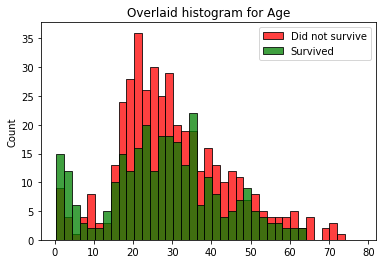

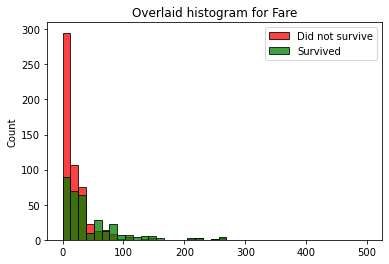

In [2]:
# Plot overlaid histograms for continuous features
for i in ['Age', 'Fare']:
    died = list(titanic[titanic['Survived'] == 0][i].dropna())
    survived = list(titanic[titanic['Survived'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.histplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.histplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Did not survive', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

We could see distribution of age for people survive & didn't survive are same.

In case of fare noticed drastic change in mean, 


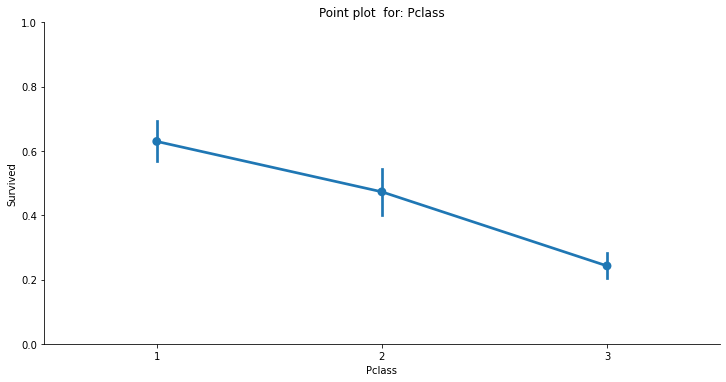

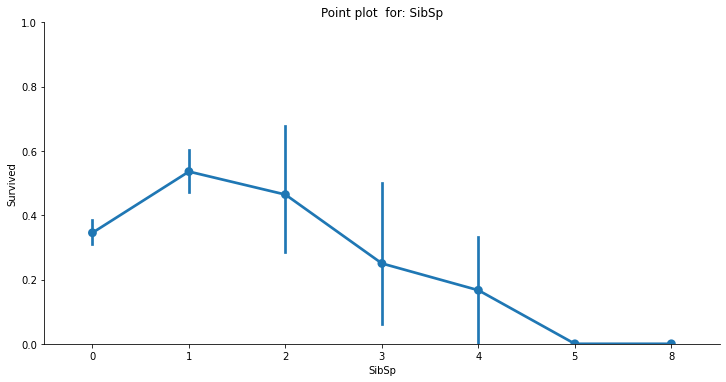

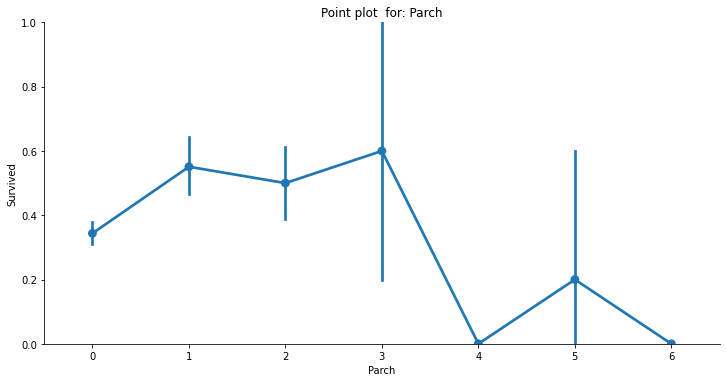

In [6]:
# Generate categorical plots for ordinal features
for col in ['Pclass', 'SibSp', 'Parch']:
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )
    plt.ylim(0, 1)
    plt.title('Point plot  for: {}'.format(col))

(0.0, 1.0)

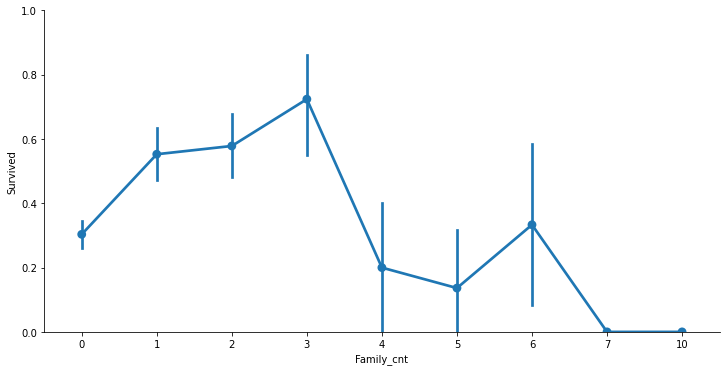

In [8]:
# Create a new family count feature

titanic['Family_cnt'] = titanic['SibSp']+titanic['Parch']
sns.catplot(x='Family_cnt', y='Survived', data=titanic, kind='point', aspect=2,)
plt.ylim(0, 1)